In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()



Saving Disease with Weather.csv to Disease with Weather.csv


{'Disease with Weather.csv': b'Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure,Disease,Disease in number\r\n18.7,77,6.9,63,11,1015.5,Early Blight,1\r\n23.4,64,4.6,137,8.9,1017,Late Blight,0\r\n20.1,72,3.2,188,10,1014.8,Early Blight,1\r\n25.6,61,7.1,282,9.6,1015.2,Late Blight,0\r\n19.5,78,5.5,104,12.5,1016.1,Early Blight,1\r\n22.2,65,2.8,200,9.1,1013.9,Late Blight,0\r\n22.4,65,4.9,154,9.2,1014.5,Early Blight,1\r\n19.8,73,5.3,211,10.8,1013.2,Late Blight,0\r\n24.1,62,6.7,278,8.5,1015.8,Late Blight,0\r\n21.2,68,3.4,107,11.5,1014.2,Early Blight,1\r\n20.3,75,4.1,192,9.8,1013.5,Early Blight,1\r\n23.5,63,7.2,305,7.9,1016.3,Late Blight,0\r\n22.3,72,5.1,179,10,1015.5,Early Blight,1\r\n24.5,65,7.2,245,8.9,1016.2,Late Blight,0\r\n19.8,76,3.3,120,11.1,1014.8,Early Blight,1\r\n26.1,60,8.4,305,9.4,1014.9,Late Blight,0\r\n21.2,75,4.9,100,12.3,1015.8,Early Blight,1\r\n23.7,67,2.1,214,9.2,1014,Late Blight,0\r\n20.5,74,4.3,153,10.2,1014.7,Early Blight,1\r\n24.1,63,6.8,258,9.1,1016.5,Late

In [ ]:
df=pd.read_csv('Disease with Weather.csv')

In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure,Disease,Disease in number
0,18.7,77,6.9,63,11.0,1015.5,Early Blight,1
1,23.4,64,4.6,137,8.9,1017.0,Late Blight,0
2,20.1,72,3.2,188,10.0,1014.8,Early Blight,1
3,25.6,61,7.1,282,9.6,1015.2,Late Blight,0
4,19.5,78,5.5,104,12.5,1016.1,Early Blight,1


In [ ]:
df.shape


(4020, 8)

In [ ]:
df.isnull().values.any()


np.False_

In [ ]:
df.isnull().sum()


,0
Temperature,0
Humidity,0
Wind Speed,0
Wind Bearing,0
Visibility,0
Pressure,0
Disease,0
Disease in number,0


In [ ]:
df.duplicated().sum()

np.int64(629)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
numerical_columns=['Temperature', 'Humidity', 'Wind Speed', 'Wind Bearing', 'Visibility', 'Pressure'	]

In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure,Disease in number
count,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000
mean,23.549484,67.235919,5.416514,186.043350,10.120171,1015.162165,0.516072
std,2.890596,6.817106,2.102747,88.874942,1.261142,0.594035,0.499815
min,17.500000,48.000000,1.200000,0.000000,6.900000,1012.600000,0.000000
25%,20.900000,61.000000,3.700000,118.000000,9.000000,1014.800000,0.000000
50%,23.200000,68.000000,5.100000,178.000000,9.900000,1015.200000,1.000000
75%,26.000000,73.000000,7.100000,264.000000,11.300000,1015.600000,1.000000
max,30.400000,83.000000,11.100000,358.000000,14.500000,1017.200000,1.000000


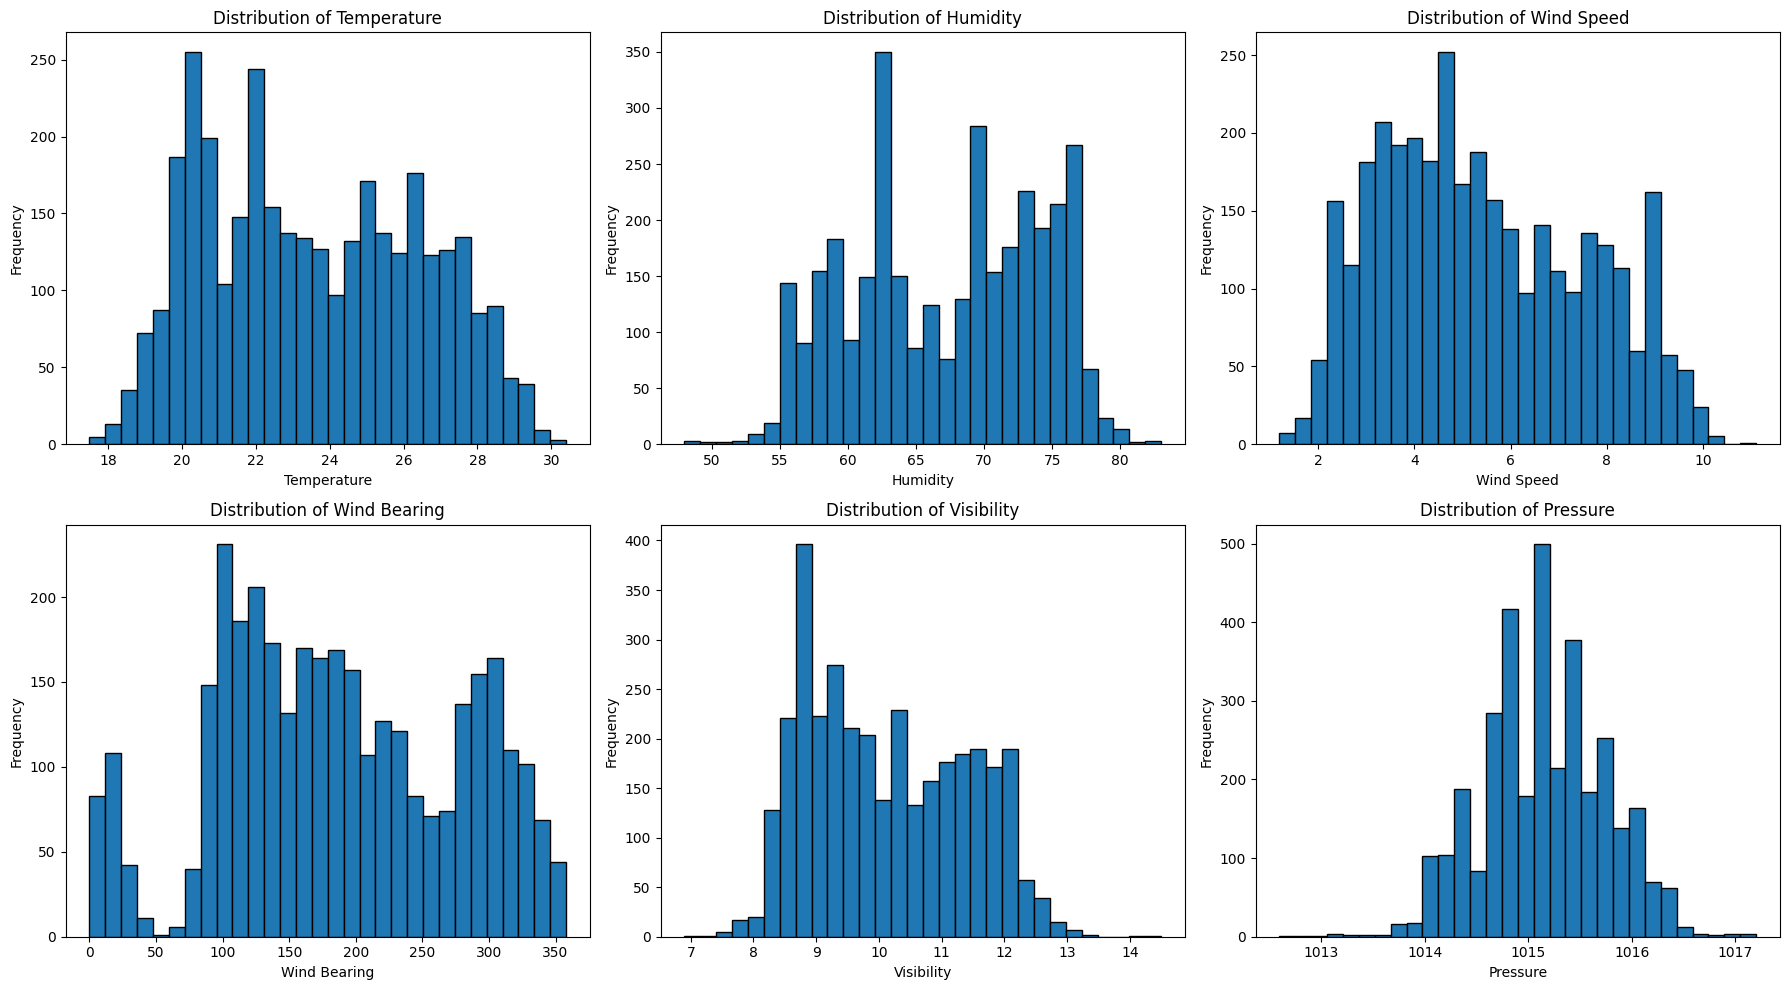

In [ ]:
#EDA
plt.figure(figsize=(18, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

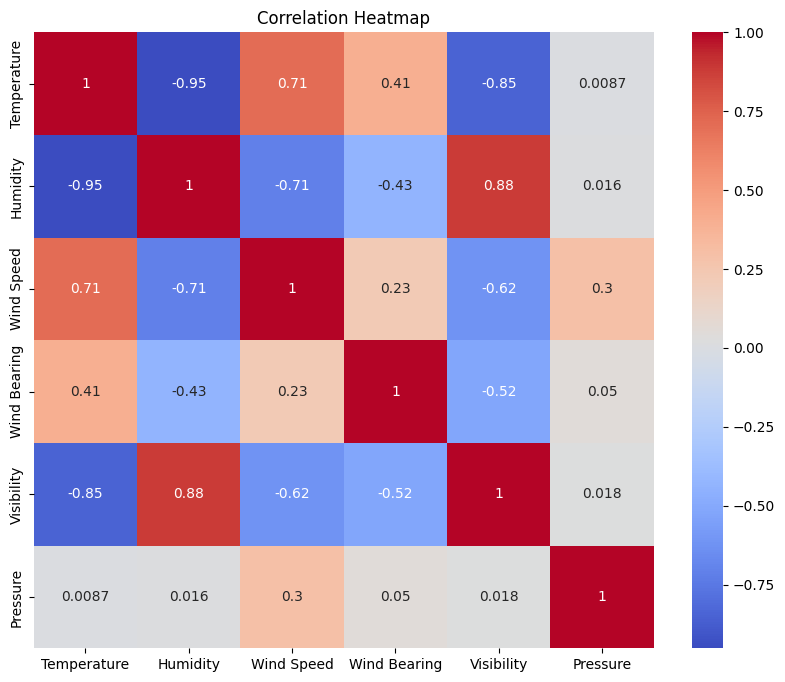

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


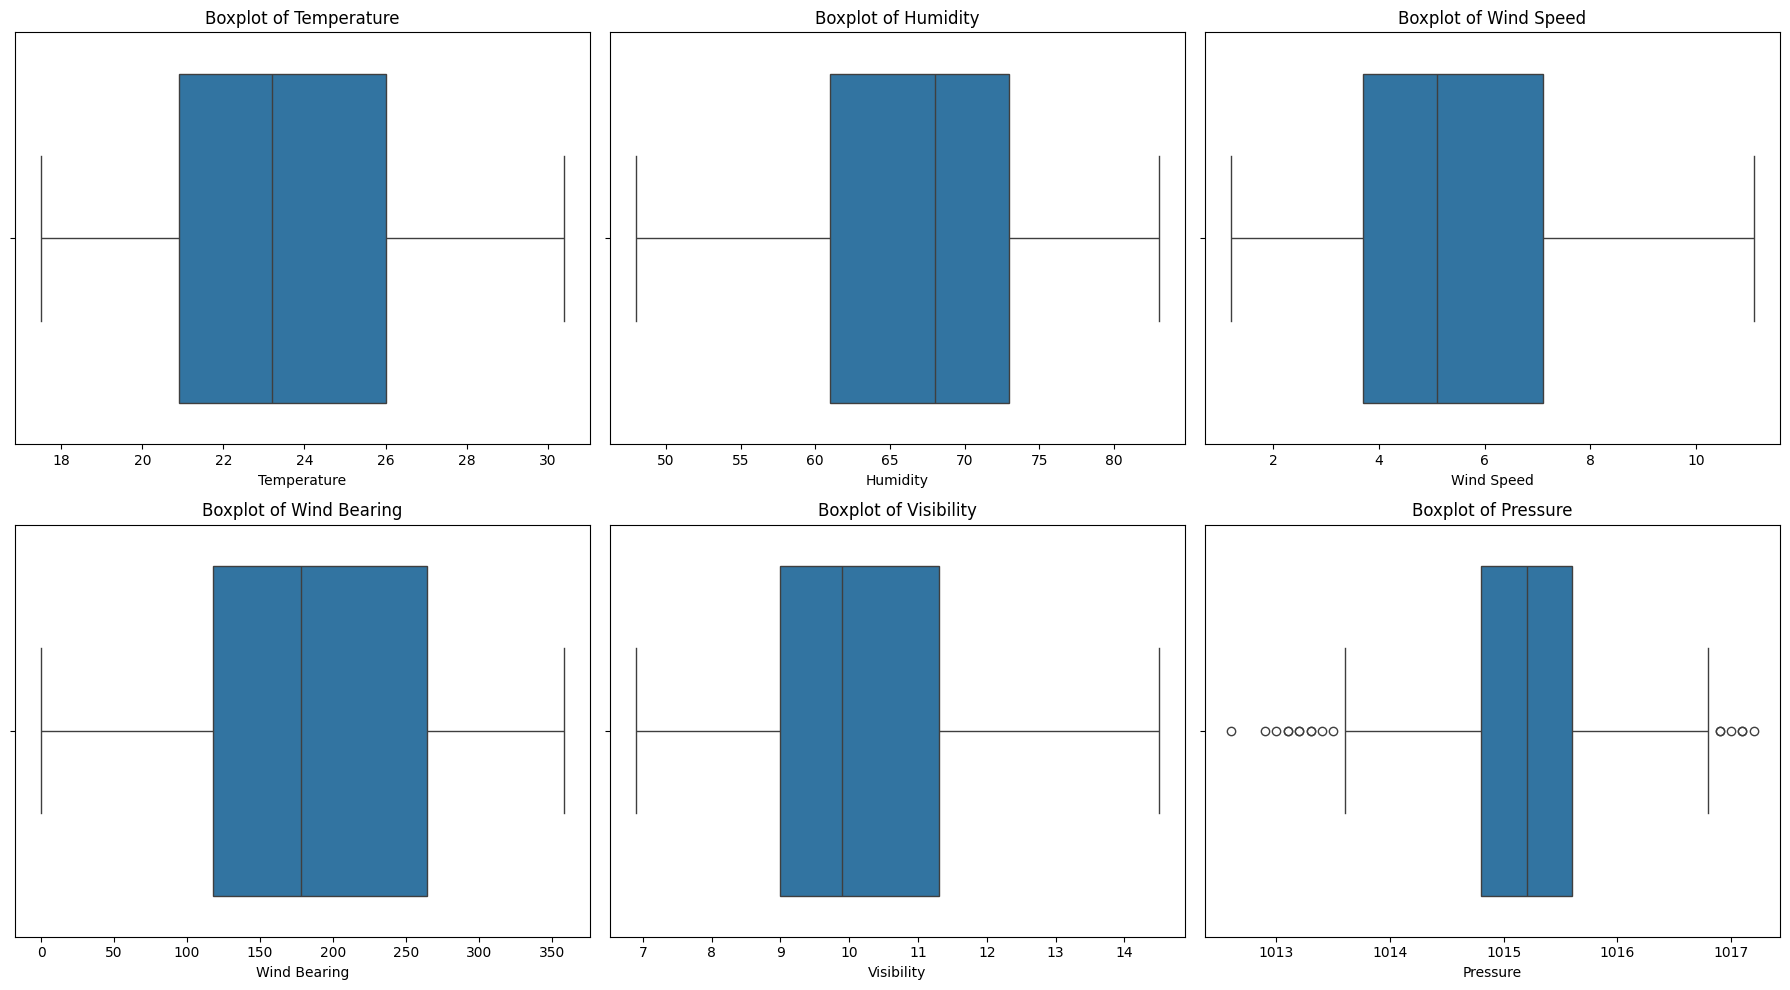

In [ ]:
plt.figure(figsize=(18, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


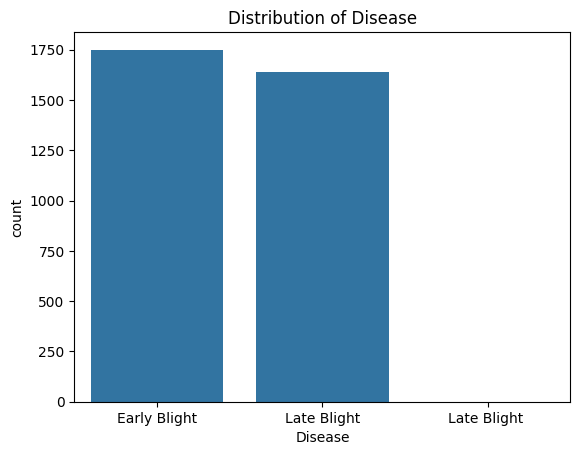

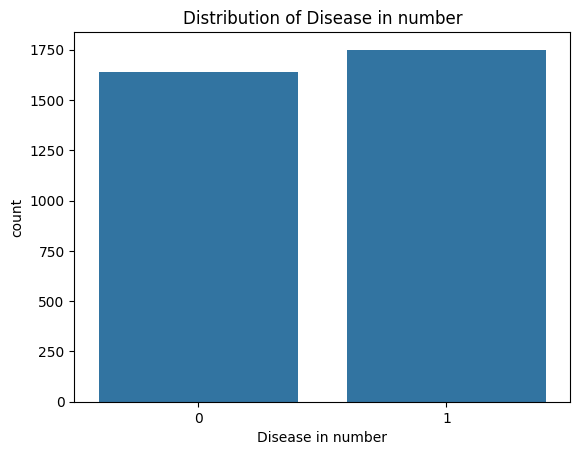

In [ ]:
targets = ['Disease', 'Disease in number']

for col in targets:
    if col in df.columns:
        sns.countplot(x=df[col])
        plt.title(f"Distribution of {col}")
        plt.show()


In [ ]:
# Clean column names
df.columns = [c.strip() for c in df.columns]

# Targets
target_num_col = "Disease in number"   # numeric label column
disease_name_col = "Disease"           # disease text column (optional, but present in your file)

# Features (drop targets)
X = df.drop(columns=[target_num_col, disease_name_col])
y = df[target_num_col].astype(int)

# Build mapping (best practice: learn mapping from your data)
label_to_name = (
    df.groupby(target_num_col)[disease_name_col]
      .agg(lambda s: s.value_counts().index[0])
      .to_dict()
)
print("Label mapping:", label_to_name)  # {0:'Late Blight', 1:'Early Blight'}

# =========================
# 2) Preprocess
# =========================
numeric_features = X.select_dtypes(include=["number"]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)

# =========================


Label mapping: {0: 'Late Blight', 1: 'Early Blight'}


In [ ]:

model = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model),
])

# =========================


In [27]:
# 4) Train/Test split + Train
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

clf.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed', 'Wind Bearing',
                                                   'Visibility', 'Pressure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=-1,
                                        random_state=42))])

In [18]:
#Evaluation
y_pred = clf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# ROC-AUC (binary)
proba = clf.predict_proba(X_test)[:, 1]
print("ROC-AUC:", round(roc_auc_score(y_test, proba), 4))


#Predict BOTH outputs (number + name)

pred_df = X_test.copy()
pred_df["true_disease_number"] = y_test.values
pred_df["pred_disease_number"] = y_pred
pred_df["true_disease_name"] = pred_df["true_disease_number"].map(label_to_name)
pred_df["pred_disease_name"] = pred_df["pred_disease_number"].map(label_to_name)
pred_df["pred_prob_class1"] = proba  # probability of label 1



Confusion Matrix:
 [[379  12]
 [  4 409]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9896    0.9693    0.9793       391
           1     0.9715    0.9903    0.9808       413

    accuracy                         0.9801       804
   macro avg     0.9805    0.9798    0.9801       804
weighted avg     0.9803    0.9801    0.9801       804

ROC-AUC: 0.9883


In [29]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

clf_xgb = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model),
])


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier



xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",
)

clf_xgb = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", xgb_model),
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

clf_xgb.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed', 'Wind Bearing',
                                                   'Visibility', 'Pressure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('model',
                 XGBClassifier(base_...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [32]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# =========================
# Evaluation
# =========================

# Predict labels
y_pred = clf_xgb.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, digits=4)
)

# =========================
# ROC-AUC (binary)
# =========================

proba = clf_xgb.predict_proba(X_test)[:, 1]
print("ROC-AUC:", round(roc_auc_score(y_test, proba), 4))

# =========================
# Predict BOTH outputs (number + name)
# =========================

pred_df = X_test.copy()
pred_df["true_disease_number"] = y_test.values
pred_df["pred_disease_number"] = y_pred
pred_df["true_disease_name"] = pred_df["true_disease_number"].map(label_to_name)
pred_df["pred_disease_name"] = pred_df["pred_disease_number"].map(label_to_name)
pred_df["pred_prob_class1"] = proba  # probability of label 1





Confusion Matrix:
 [[378  13]
 [  6 407]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9844    0.9668    0.9755       391
           1     0.9690    0.9855    0.9772       413

    accuracy                         0.9764       804
   macro avg     0.9767    0.9761    0.9763       804
weighted avg     0.9765    0.9764    0.9764       804

ROC-AUC: 0.9885


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

# preprocess = ...  # your ColumnTransformer / preprocessing pipeline

gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

clf_gb = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", gb_model),
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

clf_gb.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed', 'Wind Bearing',
                                                   'Visibility', 'Pressure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=300,
                                            random_state=42))])

In [35]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# =========================
# Evaluation
# =========================

# Predict labels
y_pred = clf_gb.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, digits=4)
)

# =========================
# ROC-AUC (binary)
# =========================

proba = clf_xgb.predict_proba(X_test)[:, 1]
print("ROC-AUC:", round(roc_auc_score(y_test, proba), 4))

# =========================
# Predict BOTH outputs (number + name)
# =========================

pred_df = X_test.copy()
pred_df["true_disease_number"] = y_test.values
pred_df["pred_disease_number"] = y_pred
pred_df["true_disease_name"] = pred_df["true_disease_number"].map(label_to_name)
pred_df["pred_disease_name"] = pred_df["pred_disease_number"].map(label_to_name)
pred_df["pred_prob_class1"] = proba  # probability of label 1



Confusion Matrix:
 [[378  13]
 [  5 408]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9869    0.9668    0.9767       391
           1     0.9691    0.9879    0.9784       413

    accuracy                         0.9776       804
   macro avg     0.9780    0.9773    0.9776       804
weighted avg     0.9778    0.9776    0.9776       804

ROC-AUC: 0.9885


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


logreg_model = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    n_jobs=-1,
    random_state=42
)

clf_lr = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", logreg_model),
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

clf_lr.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed', 'Wind Bearing',
                                                   'Visibility', 'Pressure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('model',
                 LogisticRegression(max_iter=1000, n_jobs=-1,
                                    random_state=42))])

In [37]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# =========================
# Evaluation
# =========================

# Predict labels
y_pred = clf_lr.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, digits=4)
)

# =========================
# ROC-AUC (binary)
# =========================

proba = clf_xgb.predict_proba(X_test)[:, 1]
print("ROC-AUC:", round(roc_auc_score(y_test, proba), 4))

# =========================
# Predict BOTH outputs (number + name)
# =========================

pred_df = X_test.copy()
pred_df["true_disease_number"] = y_test.values
pred_df["pred_disease_number"] = y_pred
pred_df["true_disease_name"] = pred_df["true_disease_number"].map(label_to_name)
pred_df["pred_disease_name"] = pred_df["pred_disease_number"].map(label_to_name)
pred_df["pred_prob_class1"] = proba  # probability of label 1



Confusion Matrix:
 [[377  14]
 [  5 408]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9869    0.9642    0.9754       391
           1     0.9668    0.9879    0.9772       413

    accuracy                         0.9764       804
   macro avg     0.9769    0.9760    0.9763       804
weighted avg     0.9766    0.9764    0.9764       804

ROC-AUC: 0.9885


In [38]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": clf_lr,
    "Gradient Boosting": clf_gb,
    "XGBoost": clf_xgb,
    "RandomForestClassifier": clf
}

accuracies = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9764
Gradient Boosting Accuracy: 0.9776
XGBoost Accuracy: 0.9764
RandomForestClassifier Accuracy: 0.9801


In [39]:
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print("\nBest Model:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")



Best Model:
Model: RandomForestClassifier
Accuracy: 0.9801
